In [39]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [40]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [41]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [42]:
train_images.shape

(60000, 28, 28)

In [43]:
len(train_labels)

60000

In [44]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [45]:
test_images.shape

(10000, 28, 28)

In [46]:
len(test_labels)

10000

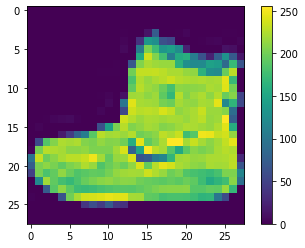

In [47]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [48]:
train_images = train_images / 255.0

test_images = test_images / 255.0

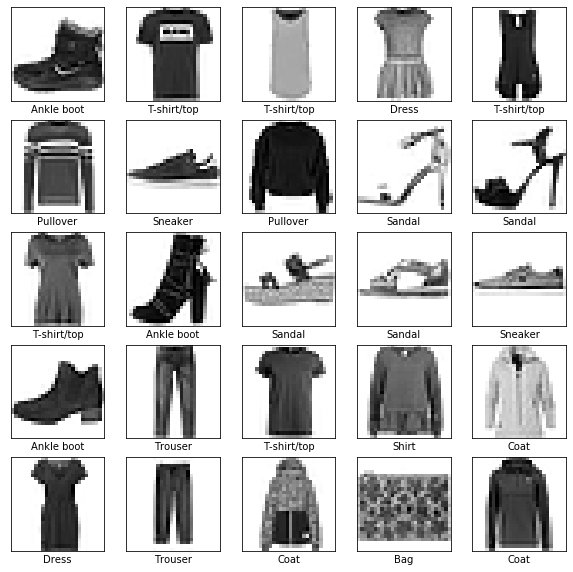

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5009 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3796 - accuracy: 0.8629
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3147 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2819 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2675 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9028
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2472 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [53]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3288 - accuracy: 0.8862

Test accuracy: 0.8862000107765198


In [54]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

In [55]:
predictions[0]

array([8.5911658e-08, 3.6332246e-10, 1.4898165e-09, 1.9590348e-11,
       1.6975074e-10, 1.4101712e-03, 9.7696642e-08, 2.2969760e-02,
       9.6289643e-10, 9.7561985e-01], dtype=float32)

In [56]:
np.argmax(predictions[0])

9

In [57]:
test_labels[0]

9

In [58]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

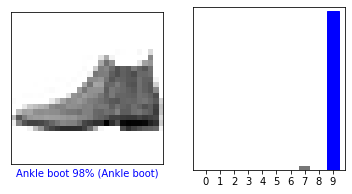

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

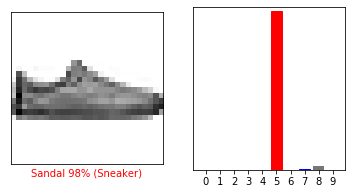

In [60]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

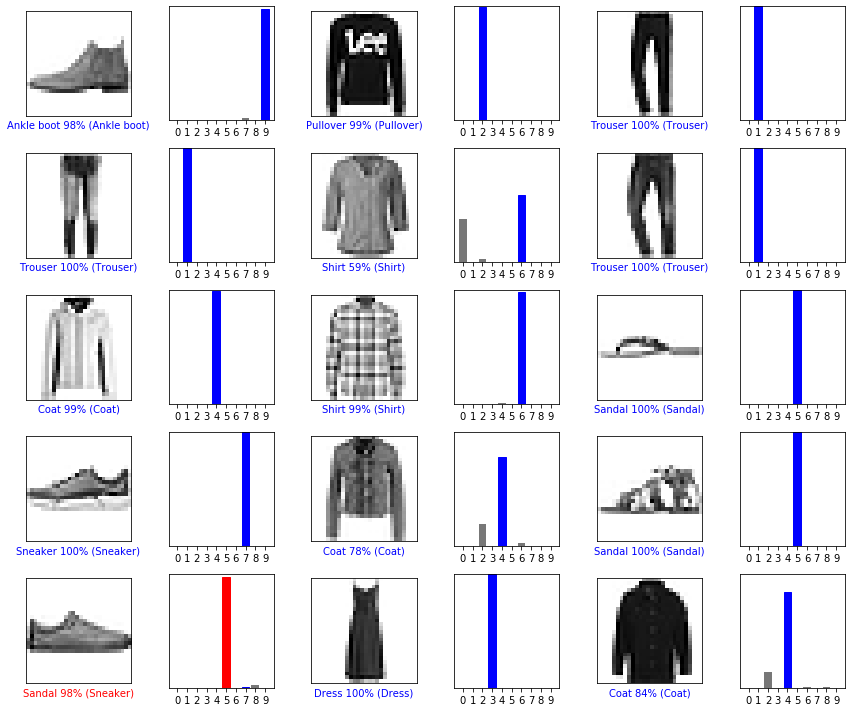

In [61]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [62]:
img = test_images[1]

print(img.shape)

(28, 28)


In [63]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [64]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.4003035e-05 1.4482671e-13 9.9268144e-01 6.1038186e-10 6.5863505e-03
  1.1850906e-10 7.0827361e-04 2.6591448e-18 6.2530763e-09 4.7628832e-16]]


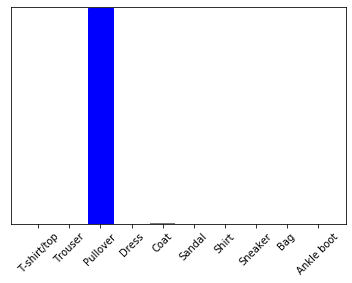

In [65]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [66]:
np.argmax(predictions_single[0])

2